# NE204 Lab 1 Test Notebook - Data Cleaning

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
print('calibration')
f_name = '../data/calibration.h5'
f_data = h5py.File(f_name,'r')
calibration = f_data['raw_data'][()]
calibration_events = f_data['event_data'][()]
print(str(calibration.shape[0])+' events')

print('co + cs calibration')
f_name = '../data/cocs_calibration.h5'
f_data = h5py.File(f_name,'r')
co_cs = f_data['raw_data'][()]
co_cs_events = f_data['event_data'][()]
print(str(co_cs.shape[0])+' events')

print('ba calibration')
f_name = '../data/ba_calibration.h5'
f_data = h5py.File(f_name,'r')
ba = f_data['raw_data'][()]
ba_events = f_data['event_data'][()]
print(str(ba.shape[0])+' events')

calibration
914193 events
co + cs calibration
228751 events
ba calibration
85135 events


# Clean data
The event data timestamps show that the last several waveforms are repeated. This is a result of the data aquisition software - it seems that the buffer dumps the last data it collected at the end of the measurement. This represents a relatively small fraction of the data. To analyze the data, these repeated events must first be removed.

<IPython.core.display.Javascript object>


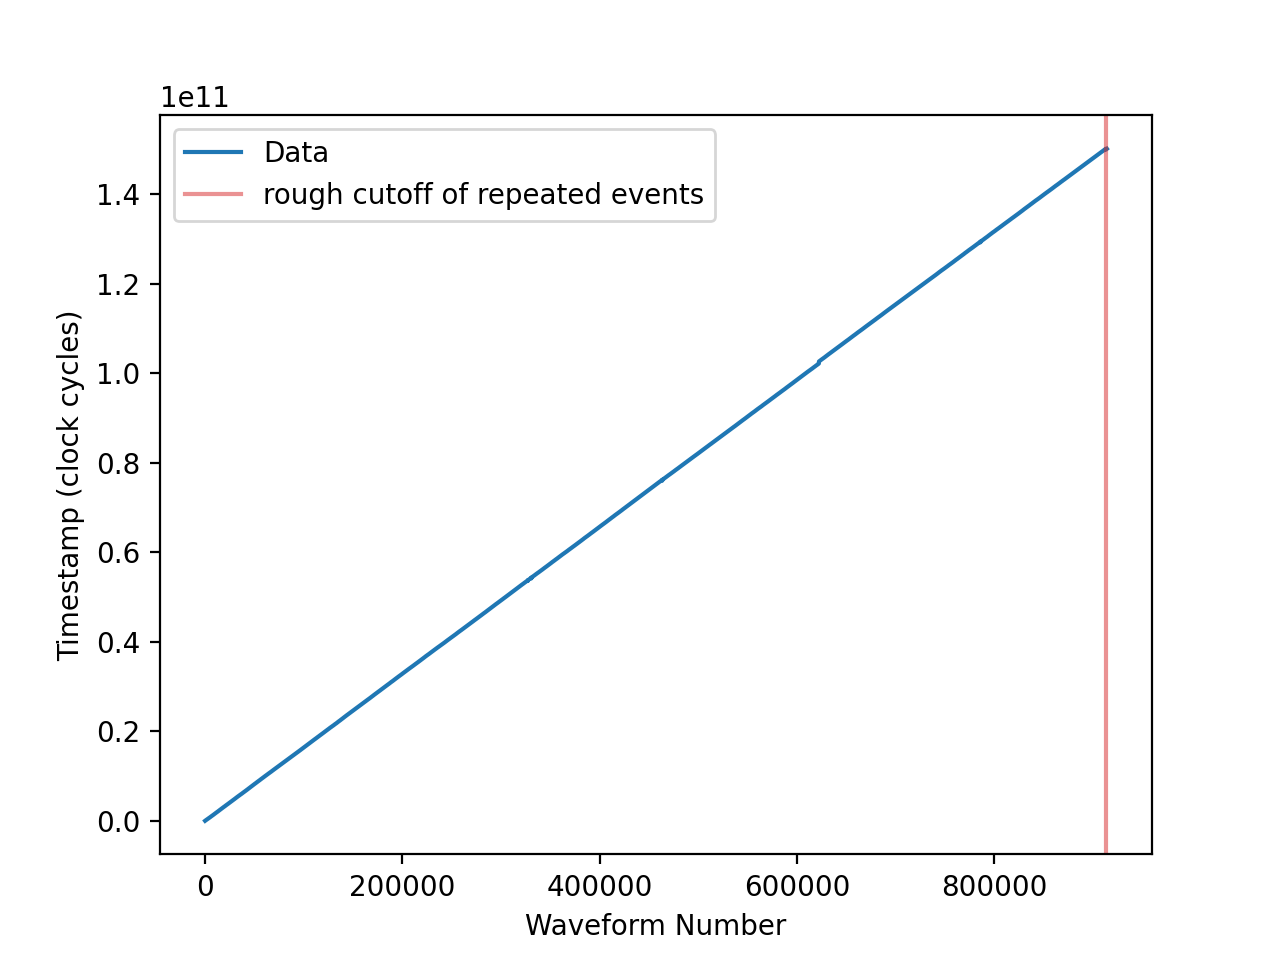

In [5]:
plt.figure()
plt.plot(calibration_events['timestamp'],label='Data')
plt.axvline(913017,c='tab:red',alpha=.5,label='rough cutoff of repeated events')
plt.legend()
plt.xlabel('Waveform Number')
plt.ylabel('Timestamp (clock cycles)')
plt.show()
plt.savefig('../figs/repeated_events_far.png')

<IPython.core.display.Javascript object>


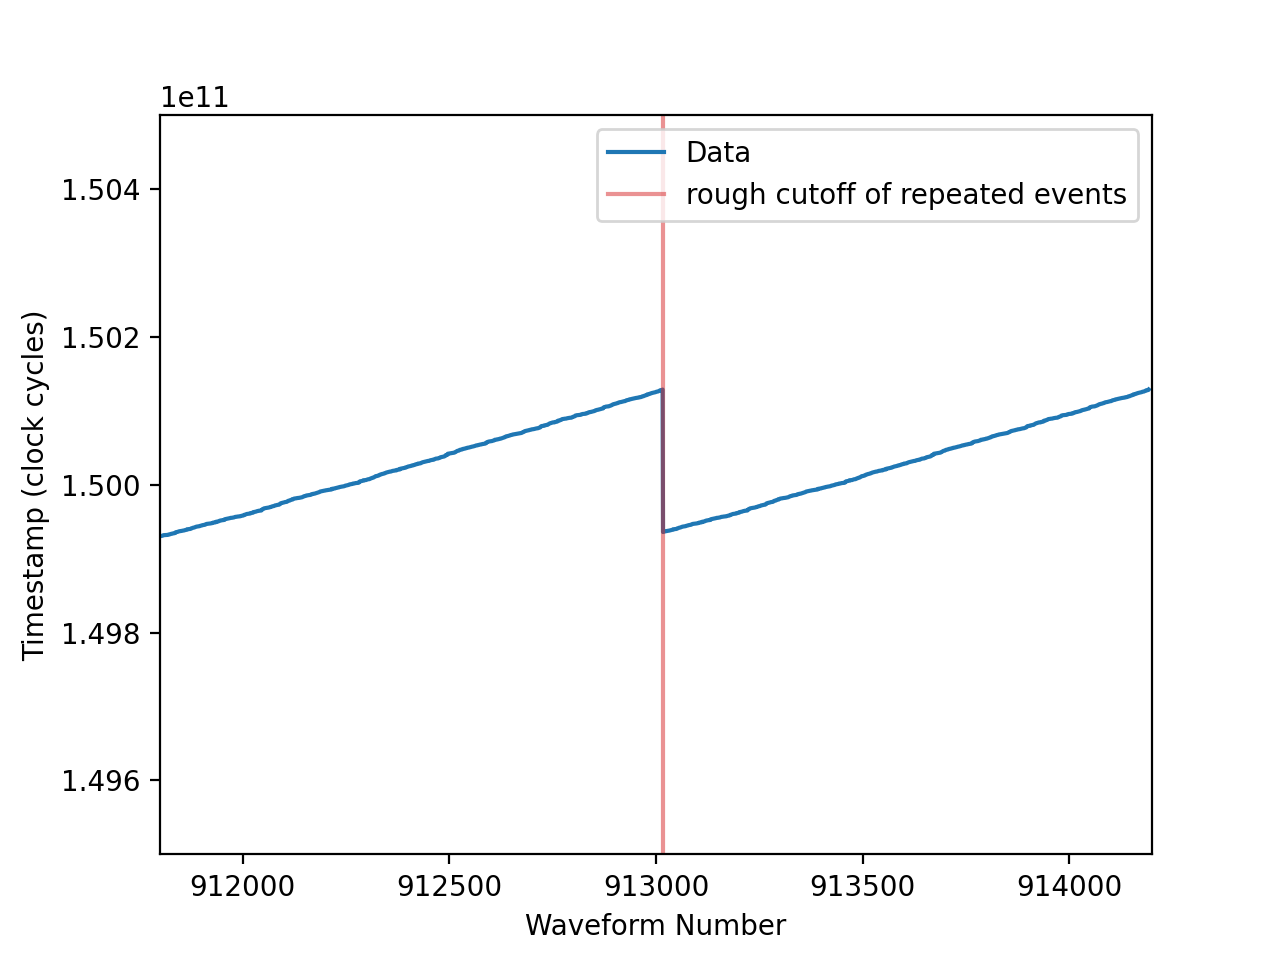

In [4]:
plt.figure()
plt.plot(calibration_events['timestamp'],label='Data')
plt.axvline(913017,c='tab:red',alpha=.5,label='rough cutoff of repeated events')
plt.legend()
plt.xlim(911800,914200)
plt.ylim(1.495e11,1.505e11)
plt.xlabel('Waveform Number')
plt.ylabel('Timestamp (clock cycles)')
plt.show()
plt.savefig('../figs/repeated_events_close.png')

In [6]:
# find unique waveforms
unique_waves, index, counts = np.unique(calibration_events['timestamp'],return_index=True,return_counts=True)
calibration_events_cleaned = calibration_events[index]
calibration_cleaned = calibration[index]

In [7]:
repeated_indices = index[counts == 2]
unique_repeated_events = calibration_events[repeated_indices]
print('total events repeated',len(unique_repeated_events))
repeated_events = calibration_events[np.isin(calibration_events['timestamp'],unique_repeated_events['timestamp'])]
repeated_data = calibration[np.isin(calibration_events['timestamp'],unique_repeated_events['timestamp'])]
print('total events repeated',len(repeated_events))
len(unique_repeated_events) * 2 == len(repeated_events)

total events repeated 1176
total events repeated 2352


True

In [8]:
# split data in half - first occurence and second occurance
pulses1 = repeated_data[:6632] 
pulses2 = repeated_data[-6632:] 

<IPython.core.display.Javascript object>


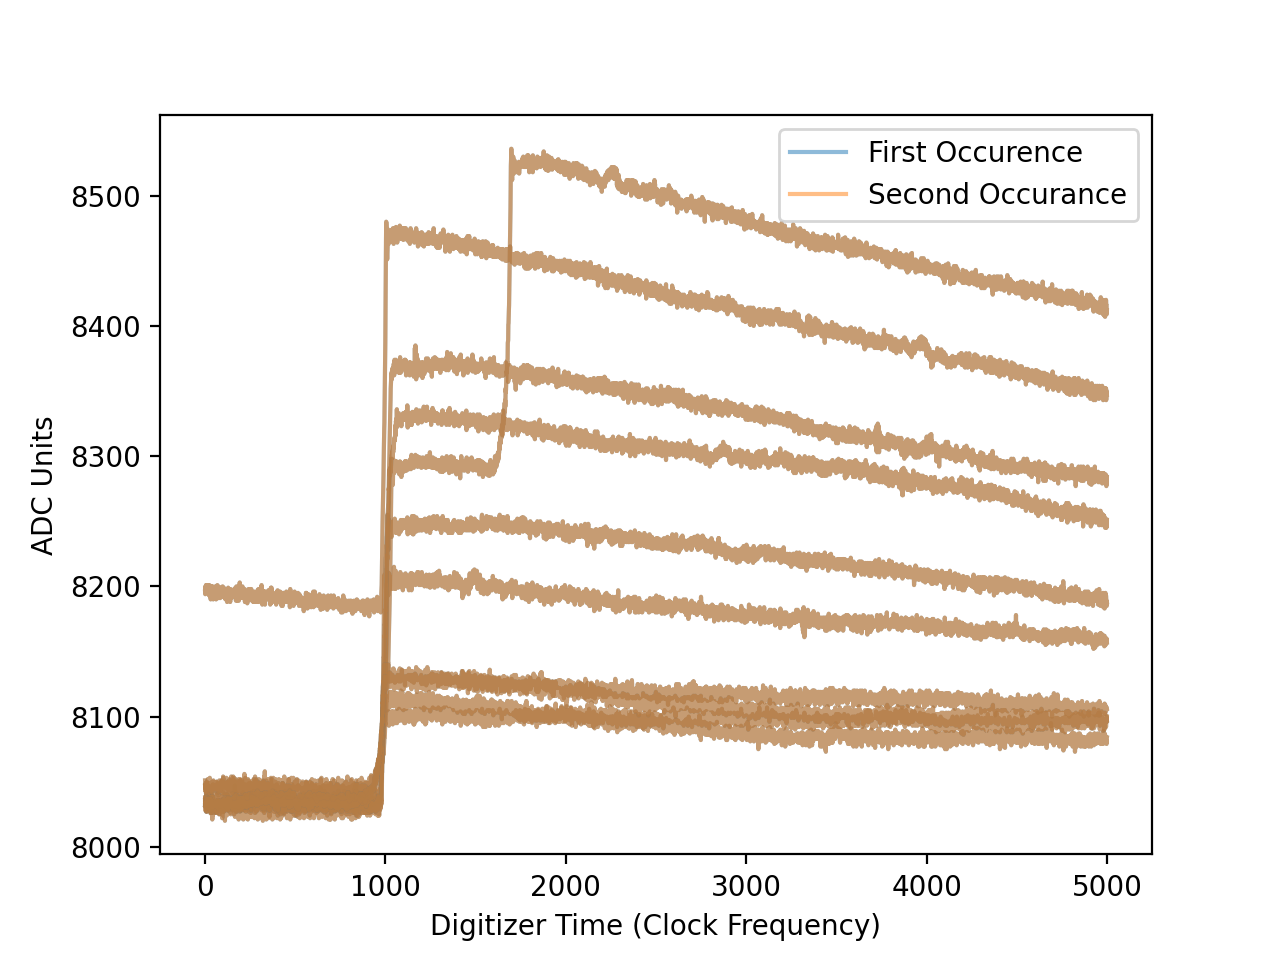

In [9]:
plt.figure()
plt.plot(1000,8150,c='tab:blue',label='First Occurence',alpha=0.5)
plt.plot(1000,8150,c='tab:orange',label='Second Occurance',alpha=0.5)
for i in range(10):
    n = int(np.random.rand()*len(pulses1))
    plt.plot(pulses1[n],c='tab:blue',alpha=0.5)
    plt.plot(pulses2[n],c='tab:orange',alpha=0.5)
plt.legend()
plt.xlabel('Digitizer Time (Clock Frequency)')
plt.ylabel('ADC Units')
plt.show()
plt.savefig('../figs/repeated_pulses_waveforms.png')